<a href="https://colab.research.google.com/github/Chetan8000/Basic_CNN/blob/master/t_sen_mnist_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = datasets.fetch_openml(
                    "mnist_784",
                    version=1,
                    return_X_y=True
)

In [3]:
pixel_values, targets = data
targets = targets.astype(int)

In [4]:
pixel_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

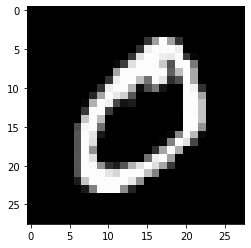

In [5]:
single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image, cmap='gray')

In [6]:

tsen = manifold.TSNE(n_components=2,random_state=100)

In [7]:
transformed_data = tsen.fit_transform(pixel_values[:3000,:])

In [8]:
t_sen_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns = ["x",'y',"target"]
)

In [9]:
t_sen_df.head()

,x,y,target
0,-15.232313,-26.184914,5.0
1,15.100454,-61.300503,0.0
2,-59.321838,15.832885,4.0
3,22.315487,45.132023,1.0
4,-34.225151,18.052425,9.0


In [10]:
t_sen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
 2   target  3000 non-null   float64
dtypes: float64(3)
memory usage: 70.4 KB


In [11]:
t_sen_df["target"] = t_sen_df["target"].astype(int)

In [12]:
t_sen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
 2   target  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


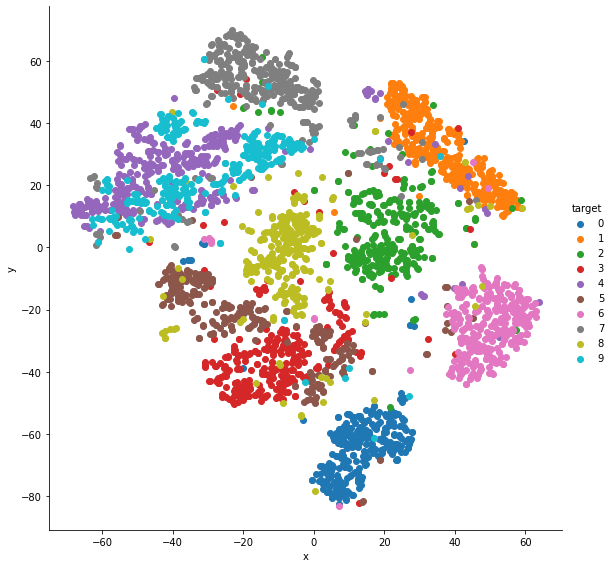

In [13]:
grid = sns.FacetGrid(t_sen_df, hue="target", size=8)
grid.map(plt.scatter, "x", "y").add_legend()